# MTH 651: Advanced Numerical Analysis

## Homework Assignment 3

#### Problem 5. (2 points)

In general, the space $\mathcal{Q}_k$ is the space of polynomials of degree at most $k$ **in each variable**.

* What is $\dim( \mathcal{Q}_k ([0,1]^2))$?
    * $\dim( \mathcal{Q}_k ([0,1]^2)) = (k+1)^2$
* What is $\dim( \mathcal{Q}_k ([0,1]^d))$?
    * $\dim( \mathcal{Q}_k ([0,1]^d)) = (k+1)^d$

#### Problem 6. (Bonus)

What are good **nodal variables** for the space $\mathcal{Q}_k$ on the unit square $[0,1]^2$?

---

Assume we use the form of nodal variables
$$
    N_i : u \mapsto u(x_i, y_i)
$$
for distinct nodal points $(x_i, y_i) \in [0,1]^2$.

For continuity, we want to place nodes at vertices of the quadrilateral.

A polynomial $u \in \mathcal{Q}_k([0,1]^2)$ takes the form
$$
    \sum_{i,j=0}^k a_{ij} x^i y^j.
$$

$u$ restricted to each edge will be a polynomial of one variable of degree at most $k$.

Therefore, for $u$ to be determined on each edge, we need $k+1$ nodes.
So that means we should have
$k-1$ nodes on the interior of each edge.
It also makes sense to enforce rotational and reflection symmetry, so each edge should have the same distribution of points, and those points should be symmetric about the midpoint of the edge.

Then, the nodes in the interior of the square can be given by the Cartesian product of the nodes on the interior of each edge (i.e. the nodes on the entire domain are the Cartesian product of the nodes on a single edge).

We care about **polynomial interpolation** using the **nodal variables**.

One important concern with polynomial interpolation is the **conditioning** of the interpolation operation (measured, e.g., by the Lebesgue constant of the points).

Since we use Cartesian product of the 1D points, we essentially reduce the problem to 1D interpolation.

Consider, e.g., the Runge function $f : [-1, 1] \to \mathbb{R}$

$$
    f(x) = \frac{1}{1 + 25x^2}
$$

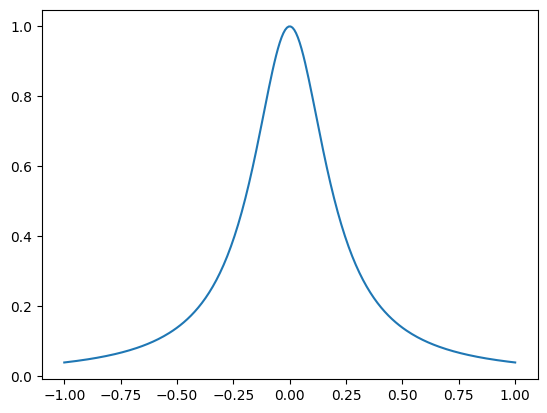

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def runge_f(x):
    return 1.0 / (1.0 + 25 * x**2)

x_plot = np.linspace(-1, 1, 250)
plt.plot(x_plot, runge_f(x_plot))

Let's interpolate this function with uniformly spaced points

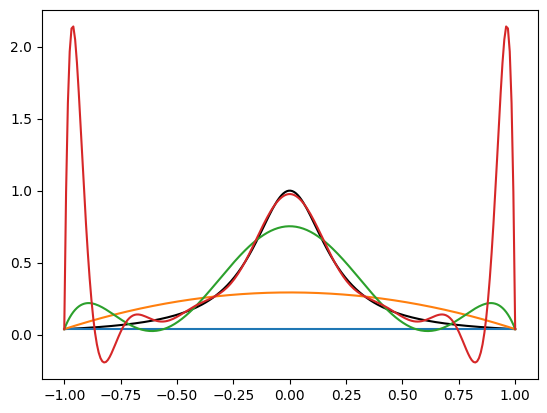

In [22]:
npts = 2

plt.plot(x_plot, runge_f(x_plot), 'k')

for i in range(4):
    degree = npts - 1
    x_interp = np.linspace(-1, 1, npts)
    poly_coeffs = np.polyfit(x_interp, runge_f(x_interp), degree)
    plt.plot(x_plot, np.polyval(poly_coeffs, x_plot))
    npts *= 2

These interpolation points **do not** result in good interpolants.

Also, consider the "conditioning" of the interpolation points, i.e. their sensitivity to small perturbations in the coefficients.

In [129]:
npts = 12
deg = npts - 1
x_interp = np.linspace(-1, 1, npts)
y_interp = np.random.rand(npts)
y_interp

array([0.64402804, 0.56453757, 0.75649376, 0.77121641, 0.88885194,
       0.91820251, 0.90197431, 0.55298906, 0.6977085 , 0.4784628 ,
       0.8323155 , 0.76578701])

Let's also add a small amount of random noise to these points

In [137]:
y_interp_perturbed = y_interp + 1e-1*np.random.rand(npts)
print(y_interp_perturbed)
print(y_interp - y_interp_perturbed)

[0.31753656 0.47161348 0.0937324  0.24318242 0.63203219 0.39643702
 0.69125706 0.33330914 0.45894165 0.61387203 0.90987792 1.00052929]
[-0.0056379  -0.06470834 -0.01499271 -0.02773593 -0.0711535  -0.0481471
 -0.06829521 -0.00778299 -0.03761711 -0.07143228 -0.02022348 -0.069024  ]


(-2.0, 5.0)

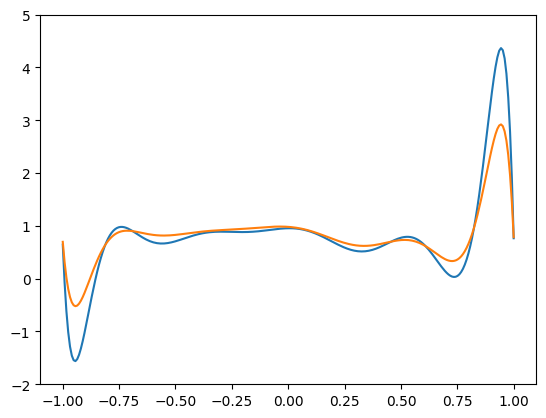

In [135]:

plt.plot(x_plot, np.polyval(np.polyfit(x_interp, y_interp, deg), x_plot))
plt.plot(x_plot, np.polyval(np.polyfit(x_interp, y_interp_perturbed, deg), x_plot))
plt.ylim(-2, 5)

Some conclusions:

* Every point value is between 0 and 1, but the interpolants oscillate wildly near the endpoints, with values of much greater magnitude, and fairly significant negative values
* Even though the perturbed version differs from the original version by only a small amount, the interpolants differ quite dramatically

In [76]:
np.polynomial.legendre.leggauss(3)[0]

array([-0.77459667,  0.        ,  0.77459667])

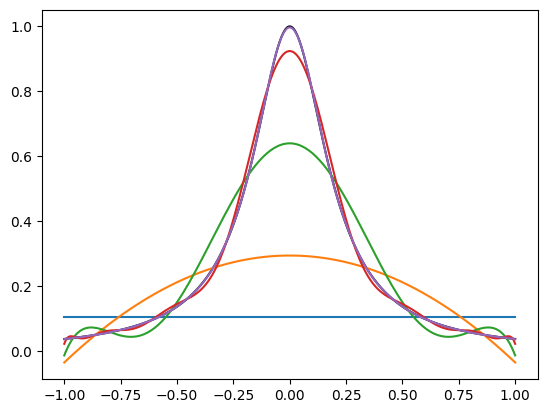

In [99]:
npts = 2

plt.plot(x_plot, runge_f(x_plot), 'k')

for i in range(5):
    degree = npts - 1
    x_interp = np.polynomial.legendre.leggauss(npts)[0]
    poly_coeffs = np.polyfit(x_interp, runge_f(x_interp), degree)
    plt.plot(x_plot, np.polyval(poly_coeffs, x_plot))
    npts *= 2

[0.31189866 0.40690514 0.07873969 0.21544649 0.56087868 0.34828992
 0.62296185 0.32552615 0.42132455 0.54243975 0.88965444 0.93150529]
[-0.0056379  -0.06470834 -0.01499271 -0.02773593 -0.0711535  -0.0481471
 -0.06829521 -0.00778299 -0.03761711 -0.07143228 -0.02022348 -0.069024  ]


(-2.0, 5.0)

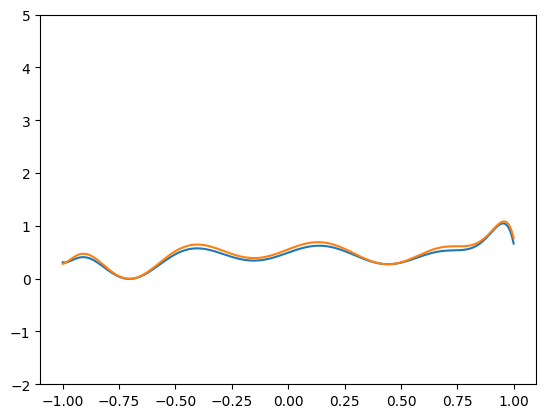

In [136]:
npts = 12
deg = npts - 1
x_interp = np.polynomial.legendre.leggauss(npts)[0]
y_interp = np.random.rand(npts)
print(y_interp)

y_interp_perturbed = y_interp + 1e-1*np.random.rand(npts)
print(y_interp - y_interp_perturbed)


plt.plot(x_plot, np.polyval(np.polyfit(x_interp, y_interp, deg), x_plot))
plt.plot(x_plot, np.polyval(np.polyfit(x_interp, y_interp_perturbed, deg), x_plot))
plt.ylim(-2, 5)

---

#### Problem 7. (4 points)

Let the domain $\Omega$ be given as the union of subdomains $K_i$.

Suppose $u$ is piecewise $C^\infty$, i.e. $u|_{K_i} \in C^\infty(K_i)$ for all $i$.

Prove that $u \in H^1(\Omega)$ iff $u$ is continuous.

#### Hint:

* Let $\boldsymbol{n}_{K_i}$ denote the outward facing normal vector on $K_i$.
* Let $v \in L^2(\Omega)$.
* Let $e$ be an **interface**, i.e. $e = K_i \cap K_j \neq \varnothing$ for some $i$ and $j$.
* Let $\Gamma$ be the union of all such interfaces (called the **skeleton** of the mesh).
* Define the **jump** of $v$ by $[v] = v_{K_i} \boldsymbol{n}_{K_i} + v_{K_j} \boldsymbol{n}_{K_j}$.
    * (Note that $[v] = (v_{K_i} - v_{K_j}) \boldsymbol{n}_{K_i}$)

Then,

$$
    \sum_{i} \int_{\partial K_i} v \phi \boldsymbol{n} \, ds = \int_\Gamma [v] \phi \, ds
$$

If $\int_\Gamma [v] \phi \, ds = 0$ for all smooth test functions, what can be inferred about $[v]$ (and hence about $v$)?

#### Problem 8: MFEM Coding. (4 points)

We are going to try to measure the **rate of convergence** of **global interpolation** in a finite element space.

**Problem 8(a).** Read carefully and understand the following MFEM code snippets (if asked to do something similar in a future assignment, you should understand how to write code like this on your own).

In [ ]:
# Install MFEM in Colab
%pip install mfem
%pip install glvis

In [3]:
# Import MFEM
import mfem.ser as mfem

def compute_interpolation_error(n, order_k, f):
    """
    Compute and return the interpolation error (measured in L2 norm)

    Parameters:
        n (int): size of Cartesian grid in each dimension
        order_k (int): polynomial degree
        f (coefficient): the function to be approximated

    Returns:
        L2 norm of the interpolation error
    """
    # Create a triangular mesh of a n x n Cartesian grid.
    # The n^2 cells of the Cartesian grid will each be split into two triangles,
    # resulting in 2*n^2 triangles.
    mesh = mfem.Mesh(n, n, "TRIANGLE")
    # Define the type of finite element we will use. We will use continuous 
    # finite elements of degree at most `order_k`.
    fe_collection = mfem.H1_FECollection(order_k, mesh.Dimension())
    # "Glue" together the finite elements to create a space on the entire mesh.
    # This represents the discrete space V_h.
    fe_space = mfem.FiniteElementSpace(mesh, fe_collection)
    # Define a "grid function" on the space. A grid function represents an 
    # element u_h of the finite element space V_h.
    u = mfem.GridFunction(fe_space)
    # Project coefficient performs the *global interpolation* of the given 
    # function (which has to be represented as a "Coefficient object"). 
    # This sets the degrees of freedom based on evaluating the *nodal variables*
    # of the input function f.
    u.ProjectCoefficient(f)
    # Return the L2 norm || u_h - f ||.
    return u.ComputeL2Error(f)

MFEM has the concept of a "coefficient". A coefficient defines an function that can be evaluated at different points in the domain. (Essentially, "coefficient" is just the MFEM terminology for a user-specified function)

In [4]:
# Define a function f that we will try to approximate by interpolation
from math import cos, exp, sin
class f(mfem.PyCoefficient):
    def EvalValue(self, xvec):
        x = xvec[0]
        y = xvec[1]
        return exp(0.1*sin(5.1*x - 6.2*y) + 0.3*cos(4.3*x +3.4*y))

In [3]:
# Example of using the above functions:

compute_interpolation_error(10, 2, f())

0.00034178312291455767

**Problem 8(b).**

Start with a mesh with `n = 4`, and refine by a factor of two 4 times.

* Set $k = 1$ and compute the $L^2$ interpolation error and empirical order of convergence.
* Repeat the same task for $k = 2$ and $k = 3$.
* Based on the above, conjecture what the order of convergence should be for arbitrary $k$.

In [9]:
import numpy as np

In [10]:
def convergence_study(k):
    n = 4
    nrefinements = 4
    nmeshes = nrefinements + 1

    errors = np.zeros(nmeshes)

    for i in range(nmeshes):
        errors[i] = compute_interpolation_error(n, k, f())
        n *= 2
    
    return errors

In [15]:
def print_convergence_table(errors):
    print("Error            Rate")
    print("-----------------------")
    n = errors.size
    for i in range(n):
        if i > 0:
            rate_fmt = "{:.5f}"
            rate = np.log2(errors[i-1] / errors[i])
        else:
            rate_fmt = "{}"
            rate = "---    "
        print("{:10e}".format(errors[i]), "    ", end="")
        print(rate_fmt.format(rate), "           ", end="")
        print()

In [16]:

print_convergence_table(convergence_study(1))

Error            Rate
-----------------------
4.970095e-02     ---                
1.322836e-02     1.90964            
3.361170e-03     1.97660            
8.437389e-04     1.99410            
2.111512e-04     1.99852            


In [12]:
print_convergence_table(convergence_study(2))

Error            Rate
-----------------------
5.071870e-03     ---                
6.636061e-04     2.93412            
8.398784e-05     2.98207            
1.053174e-05     2.99544            
1.317514e-06     2.99885            


In [13]:
print_convergence_table(convergence_study(3))

Error            Rate
-----------------------
5.970959e-04     ---                
4.070660e-05     3.87463            
2.594326e-06     3.97183            
1.629358e-07     3.99298            
1.019586e-08     3.99825            


In [14]:
print_convergence_table(convergence_study(4))

Error            Rate
-----------------------
9.039550e-05     ---                
2.994037e-06     4.91609            
9.550466e-08     4.97038            
3.000183e-09     4.99245            
9.387899e-11     4.99810            
